# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [31]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [32]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

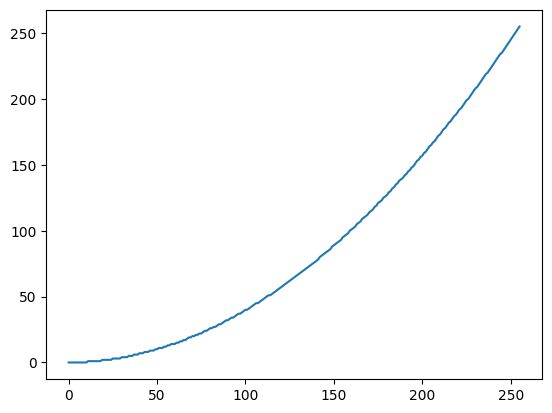

In [33]:
import lut
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [34]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

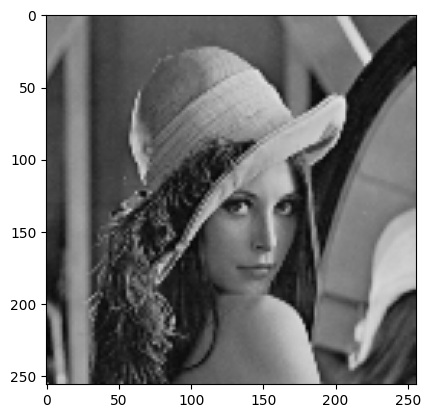

In [79]:
img_lena = cv2.imread("lena.bmp")
plt.imshow(img_lena)


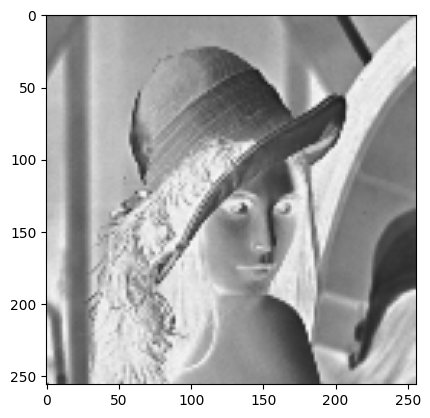

In [36]:
img_lena_revert = cv2.LUT(img_lena, lut.odwrotna)
plt.imshow(img_lena_revert)


Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [37]:
def LUT(img, lut):
    transformed_img = cv2.LUT(img, lut)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].plot(lut, color='b')
    axs[0].set_title('Wykres LUT')
    axs[0].set_xlabel('Wejście')
    axs[0].set_ylabel('Wyjście')

    axs[1].imshow(img)
    axs[1].set_title('Oryginalny obraz')
    axs[1].axis('off')

    # Prawe pole - przekształcony obraz
    axs[2].imshow(transformed_img)
    axs[2].set_title('Przekształcony obraz')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()


Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

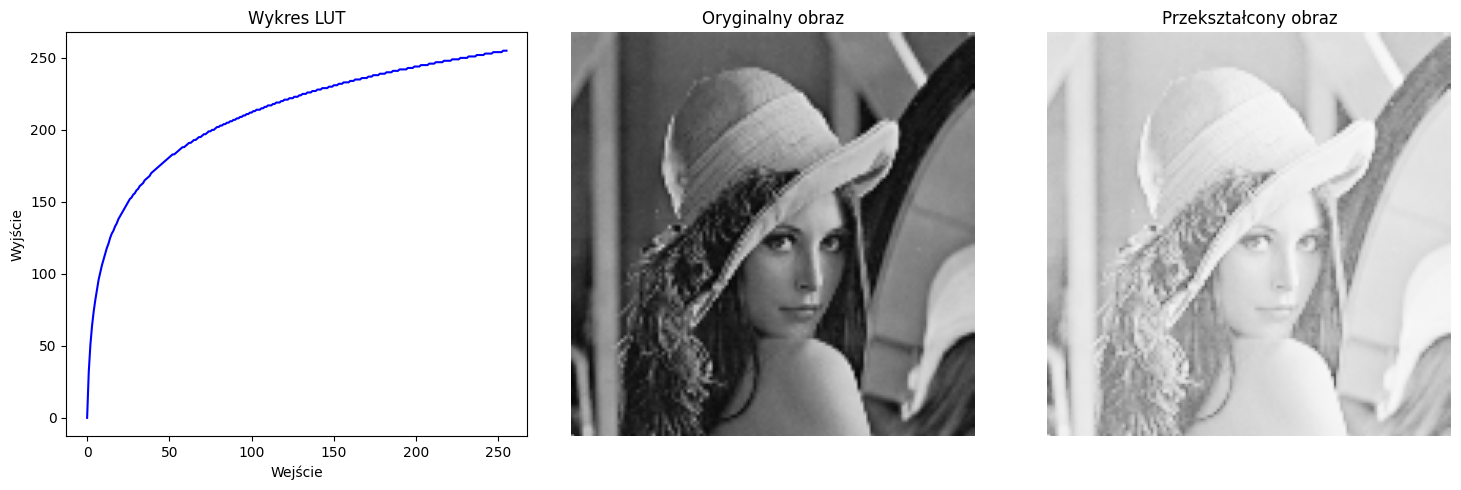

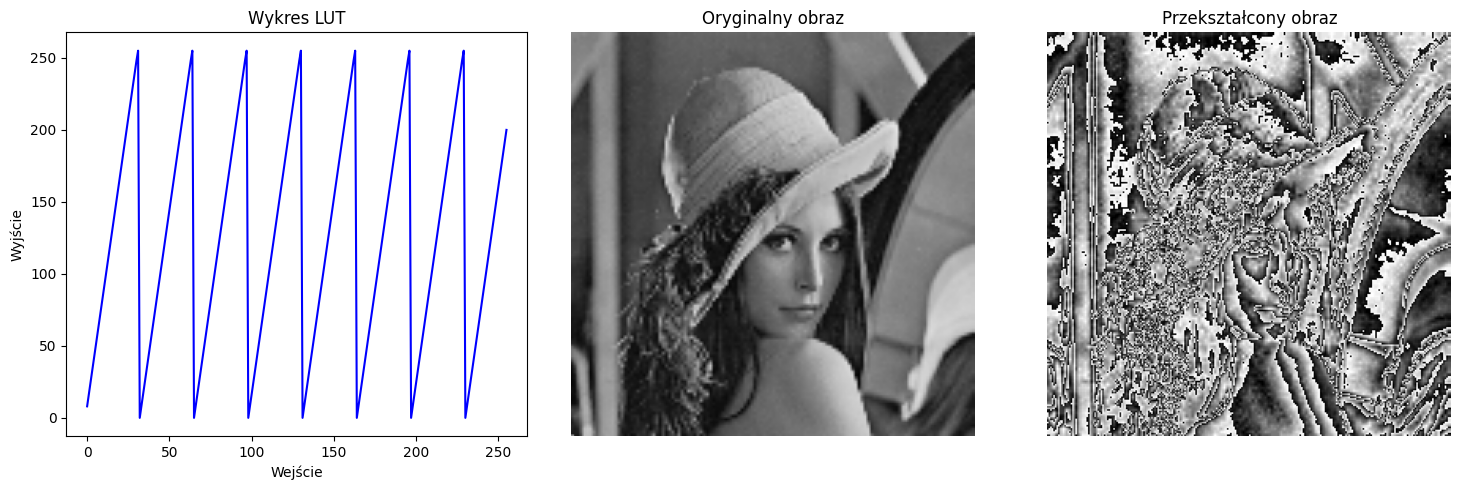

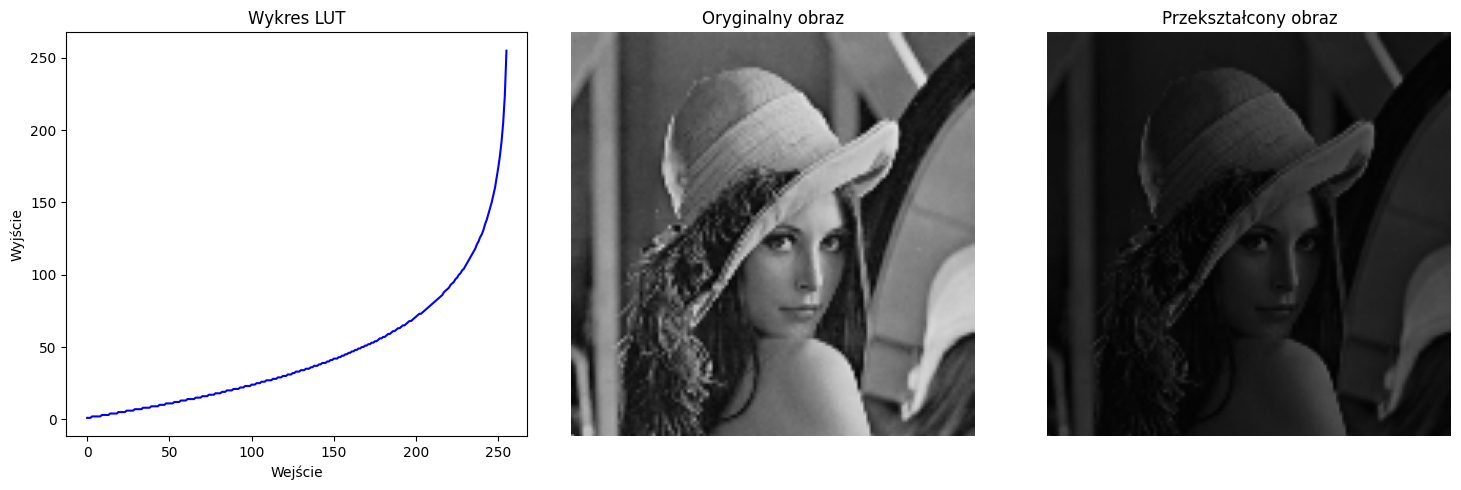

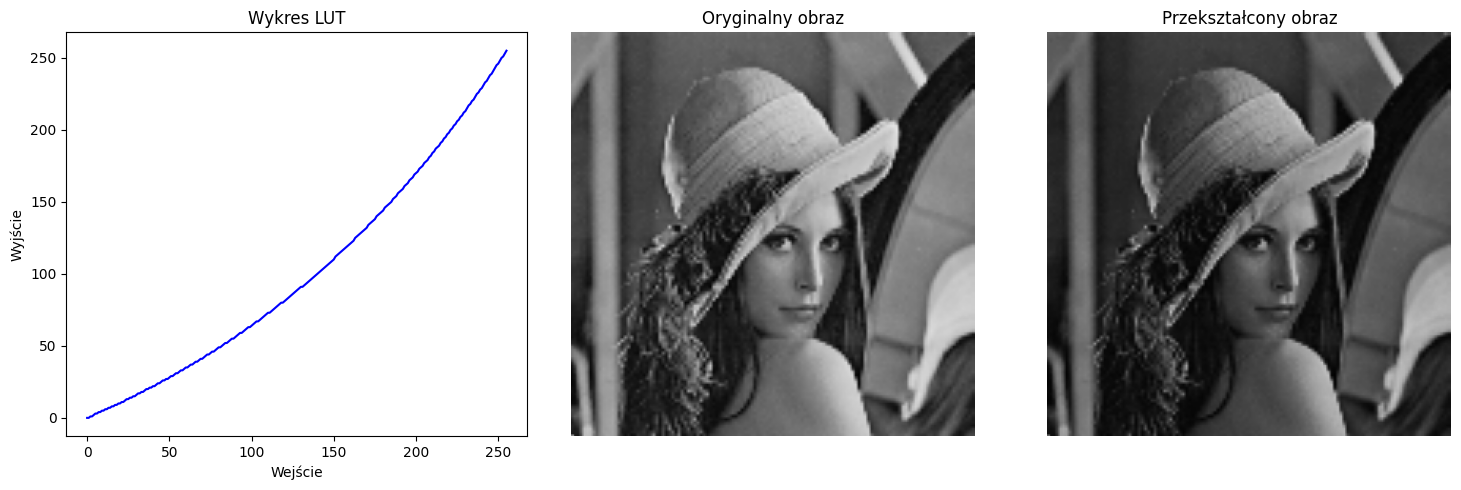

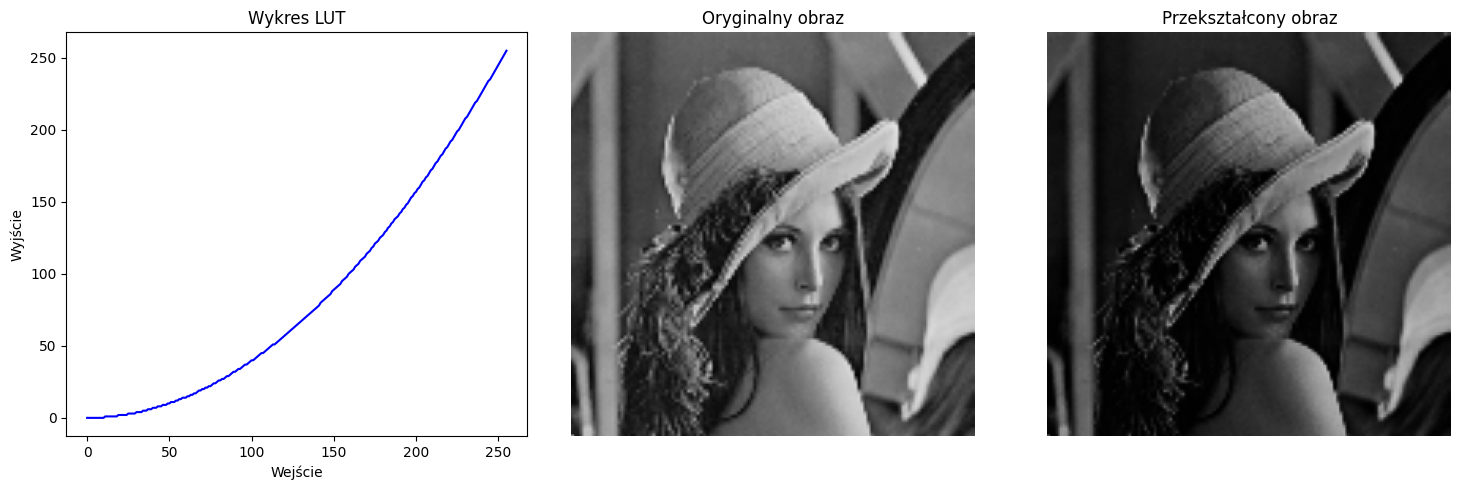

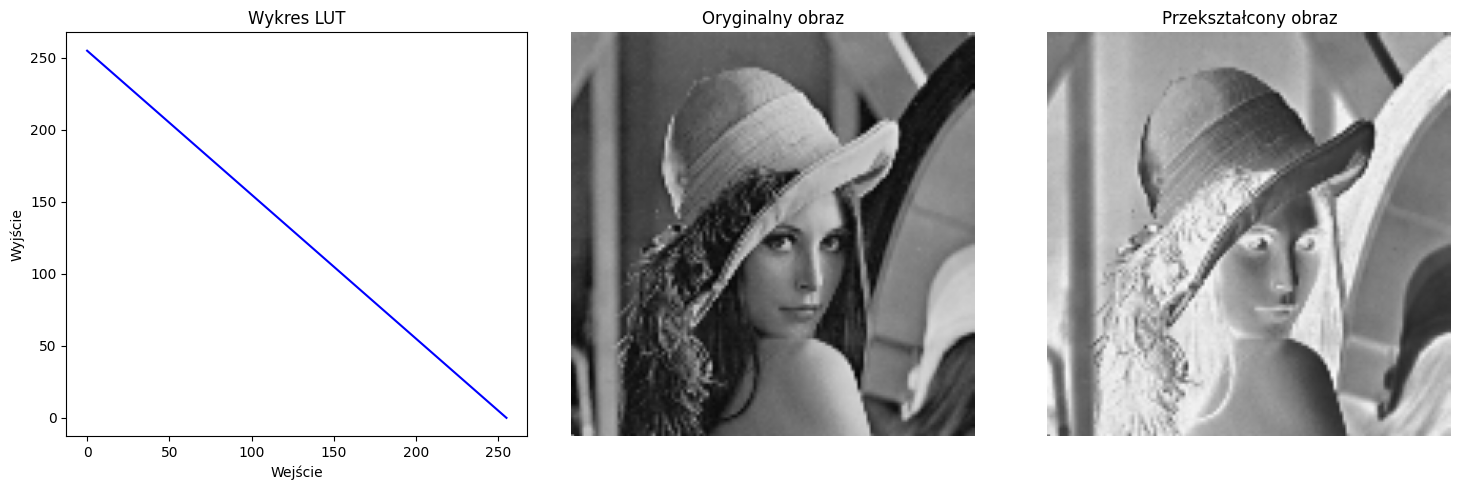

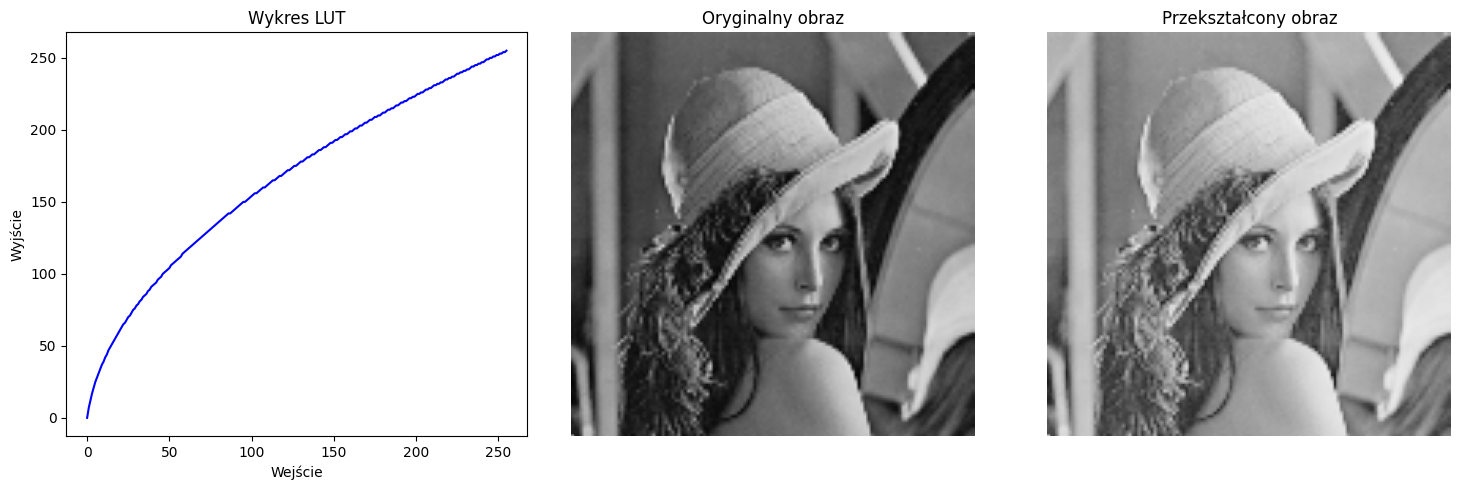

In [38]:
luts = [
    lut.log, lut.pila, lut.odwlog, lut.wykladnicza, lut.kwadratowa, lut.odwrotna, lut.pierwiastkowa
]
for lut in luts:
    LUT(img_lena, lut)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

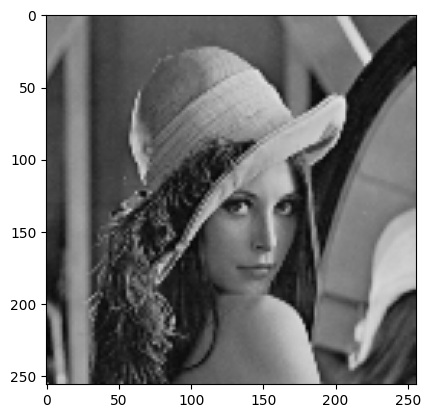

In [80]:
img_lena = cv2.imread("lena.bmp")
plt.imshow(img_lena)

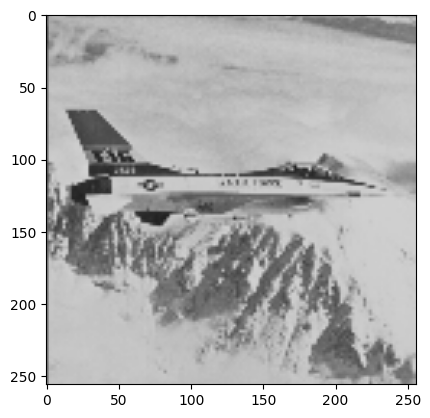

In [81]:
img_jet = cv2.imread("jet.bmp")
plt.imshow(img_jet)

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

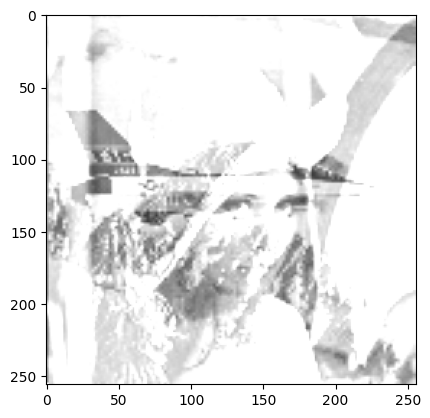

In [47]:
img_added = cv2.add(img_lena, img_jet)
plt.imshow(img_added)

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

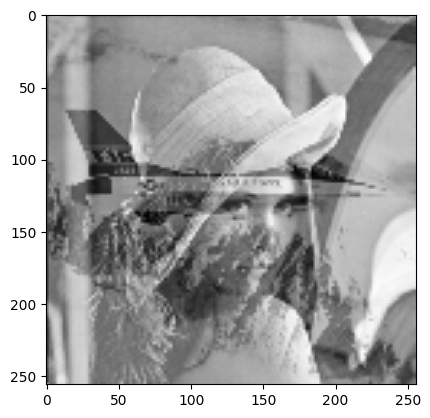

In [103]:
img_lena_16 = img_lena.astype('uint16')
img_jet_16 = img_jet.astype('uint16')

img_added_16 = cv2.add(img_lena_16, img_jet_16)
plt.imshow(img_added_16.astype('uint8'))
def scale(img_uint16):
    min_val = np.min(img_uint16)
    max_val = np.max(img_uint16)
    img_uint8_manual = ((img_uint16 - min_val) / (max_val - min_val) * 255).astype('uint8')
    return img_uint8_manual

plt.imshow(scale(img_added_16))

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

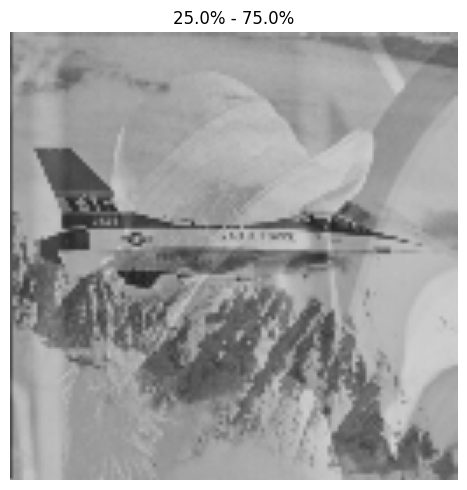

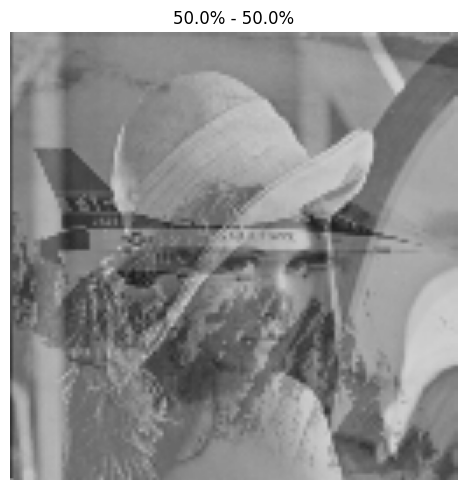

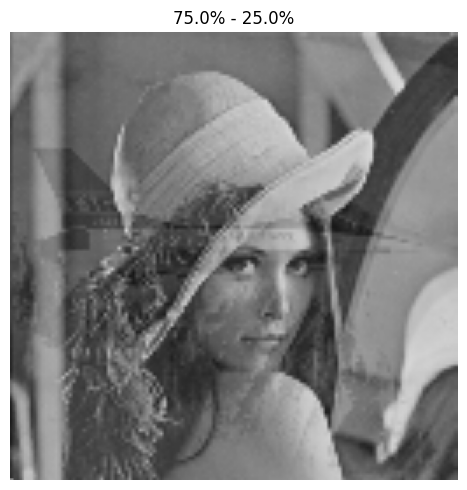

In [55]:
def linear_combination(img_1, alpha, img_2, beta, gamma):
    combined_img = cv2.addWeighted(img_1, alpha, img_2, beta, gamma)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    # Prawe pole - przekształcony obraz
    ax.imshow(combined_img)
    ax.set_title(f'{alpha*100}% - {beta*100}%')
    ax.axis('off')

    plt.tight_layout()
    plt.show()

cases = [
    [0.25, 0.75, 0],
    [0.5, 0.5, 0],
    [0.75, 0.25, 0],
]

for case in cases:
    linear_combination(img_lena, case[0], img_jet, case[1], case[2] )

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

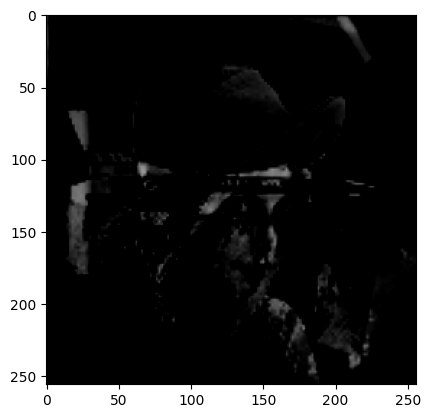

In [57]:
img_sub = cv2.subtract(img_lena, img_jet)
plt.imshow(img_sub)

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

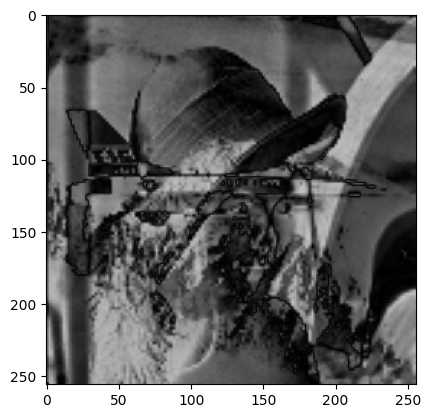

In [92]:
img_lena_16 = img_lena.astype('int16')
img_jet_16 = img_jet.astype('int16')
img_subtracted_16 = cv2.subtract(img_lena_16, img_jet_16)
img_abs_difference = np.abs(img_subtracted_16)

plt.imshow(img_abs_difference)

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

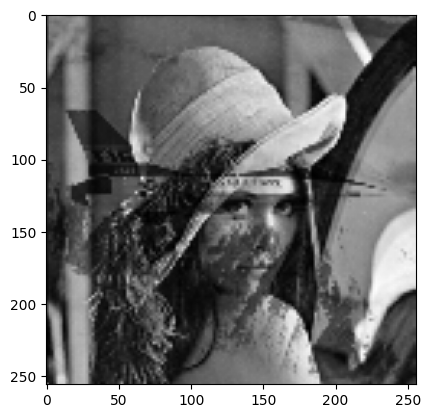

In [105]:
img_lena_float = img_lena.astype('float64')
img_jet_float = img_jet.astype('float64')

img_multiplied = cv2.multiply(img_lena_float, img_jet_float)

# img_multiplied_uint8 = img_multiplied.astype('uint8')

plt.imshow(scale(img_multiplied))

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

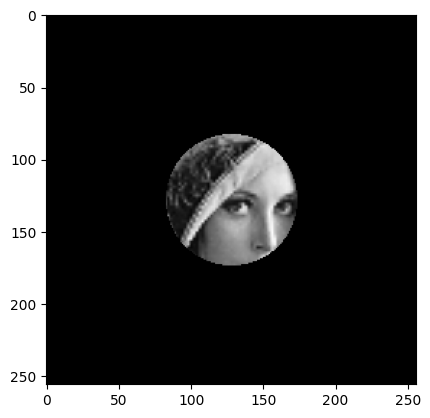

In [106]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

img_mask = cv2.imread("kolo.bmp")

img_mask = img_mask.astype('bool').astype('uint8')
img_mask_float = img_mask.astype('float64')

img_multiplied = cv2.multiply(img_lena_float, img_mask_float)

img_multiplied_uint8 = img_multiplied.astype('uint8')
plt.imshow(img_multiplied_uint8)

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

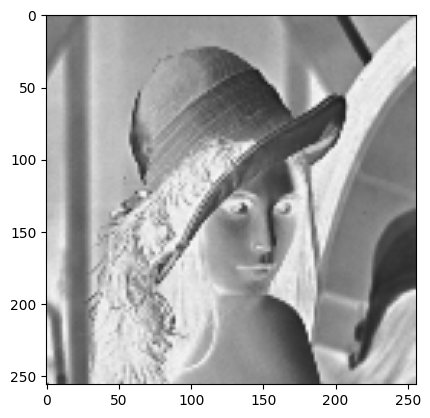

In [67]:
img_lena_negative = cv2.bitwise_not(img_lena)
plt.imshow(img_lena_negative)

# z lut wczesniej robiłem

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

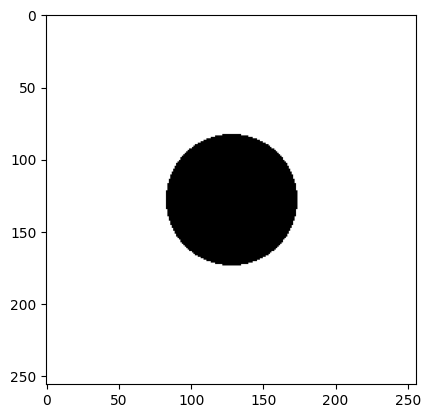

In [76]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

img_kolo = cv2.imread("kolo.bmp")
img_kwadrat = cv2.imread("kwadrat.bmp")

plt.imshow(img_kolo)
img_kolo_not = ~img_kolo
plt.imshow(img_kolo_not)

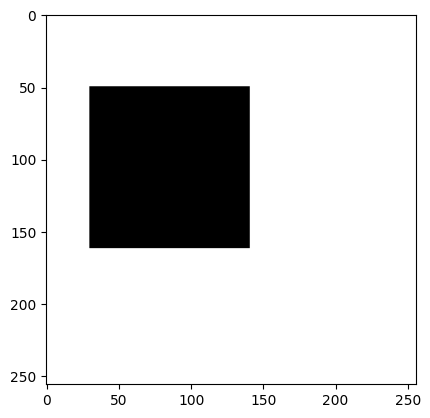

In [84]:
plt.imshow(~img_kwadrat)

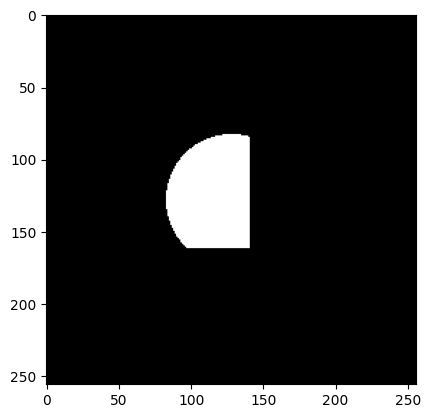

In [77]:
plt.imshow(img_kolo & img_kwadrat)

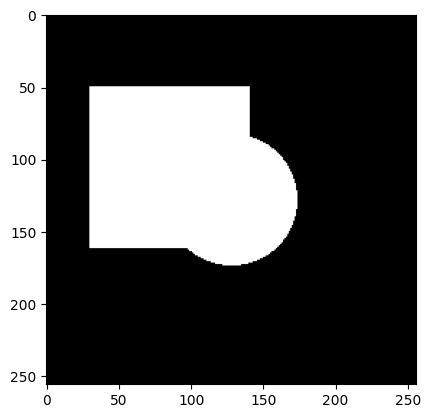

In [82]:
plt.imshow(img_kolo | img_kwadrat)

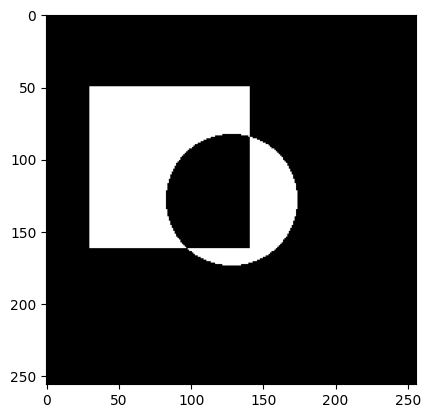

In [83]:
plt.imshow(img_kolo ^ img_kwadrat)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.